# Sampling and EDA

In [1]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Will only take sample of original data

In [2]:
df = pd.read_csv('../data/books_reviews_final.csv', index_col=None)

In [3]:
df.head(3)

,book_id,title,user_id,rating
0,5,Harry Potter and the Prisoner of Azkaban (Harr...,bc6d83b6af829e36a25d186a92045fbf,3
1,5,Harry Potter and the Prisoner of Azkaban (Harr...,84f866eb6dae54d7ac52d45a4c9b4d1f,4
2,5,Harry Potter and the Prisoner of Azkaban (Harr...,250b638bde20b432799c4aaafaba2050,5


In [4]:
df.shape

(436948, 4)

In [5]:
# Drop users with at least 250 ratings

df = df.groupby('user_id').filter(lambda x:len(x) < 250)

In [6]:
# Drop users with less than 6 ratings

df = df.groupby('user_id').filter(lambda x:len(x) > 5)

In [7]:
# Drop books with less than 11 ratings

df = df.groupby('book_id').filter(lambda x:len(x) > 10)

In [8]:
# Drop users with only 1 rating

df = df.groupby('user_id').filter(lambda x:len(x) > 1)

In [9]:
len(df['book_id'].unique())  #captured 3_512 books

3512

In [10]:
len(df['user_id'].unique()) #captured 7_684 users

7684

In [11]:
df.shape #captured 91_567 ratings

(91567, 4)

In [12]:
# df['book_id'].value_counts()  
# check frequency of books

In [13]:
# df['user_id'].value_counts()
# check frequency of users

In [14]:
# Since we had to drop some books and readers, the distribution of the ratings changed

# Slightly higher mean rating than original data (3.98)

df['rating'].describe() 

count    91567.000000
mean         4.086024
std          0.914045
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [15]:
df['rating'].value_counts(normalize=True)

5    0.388852
4    0.373300
3    0.183483
2    0.043749
1    0.010615
Name: rating, dtype: float64

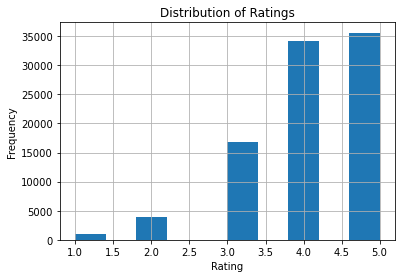

In [16]:
df['rating'].hist()
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings");

In [17]:
# Check average rating per user

user_ave_df = df[['user_id', 'rating']].groupby(by = ['user_id']).mean()

In [18]:
user_ave_df.head(2)

,rating
user_id,
002a023d3de233b4bd3ec4fc3e9c581a,4.222222
002eff40d3de8ff36174a48d26d93da7,3.416667


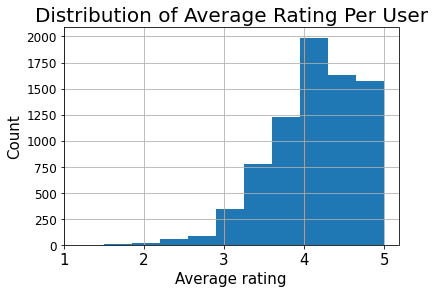

In [19]:
user_ave_df.hist()
plt.xticks(ticks=[1,2,3,4,5],labels=[1,2,3,4,5], fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Average rating", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Distribution of Average Rating Per User", fontsize=20);

In [20]:
user_ave_df.describe() 

# captured lower average ratings per user
# original data's mean was 4.22
# 25%tile rating was 4.0

,rating
count,7684.000000
mean,4.134854
std,0.564434
min,1.500000
25%,3.769231
50%,4.166667
75%,4.512934
max,5.000000


In [21]:
#df.to_csv('../data/books_reviews_sample.csv', index = False)

Note: This last file will be used for modeling.